# Web Scraping de Resenhas de Livros

#### Desenvolvido por Daniel Jullien

Também disponível em: https://colab.research.google.com/drive/1nT5Z0rSG4CNYWfX-zEnD1FL5B55DBOUZ?usp=sharing

## Índice
* [Introdução](#introduction)
* [Metodologia](#methodology)
* [Desenvolvimento das Funções](#development)
* [Raspagem de Dados](#webscraping)
* [Dados Adquiridos](#data)

## 1. Introdução <a name="introduction"></a>

Web Scraping  (ou, em portugês, raspagem de web) é um método de extrair dados de um website, de modo que a informação selecionada, originalmente  dispersa no site, seja organizada de forma tabular , geralmente como uma etapa inicial para análises e modelages futuras.

Desta foma, este projeto é, na realidade, a etapa de aquisição de dados e construção da base de dados de um projeto de um Sistema de Recomendação de Livros, ainda em desenvolvimento na data de pubicação deste documento.

No Sistema de Recomendação, deseja-se realizar um sistema que utilize NLP em resenhas de livros para auxiliar o processo de recomendação, assim, duas bases de dados serão construídas. 
1. Uma base de dados de livros, com, ao menos, as seguintes informações:
- Título
- Autor
- Descrição
- Gênero

2. Uma base de dados de resenhas feitas a respeito desses mesmos livros.


Para a obtenção destas informações, optou-se por realizar uma raspagem do site Skoob, um site dedicado a resenhas, sugestões e organização de leituras. <br>
A partir das investigações iniciais no site, qualquer outra informação significativa encontrada poderá ser também adicionada ao dataset, assim como, informações que inicialmente julgamos importantes podem ser modificadas após análise.


## 2. Metodologia<a name="methodology"></a>

O processo de Web Scraping será dividido em etapas:
1. Investigação do site para identificar as variáveis a serem coletadas e as URLs/páginas onde estão disponíveis
2. Investigação da estrutura da páginas, através da estrutura em HTML
3. Construção de funções para auxiliar a raspagem
4. Raspagem e construção da base de dados

### Investigação do site Skoob

Iniciou-se a investigação selecionando livros aleatórios e buscando identificar um padrão no url do site que permitisse identificar e acessar facilmente cada livro, garantindo que o Skoob seria um bom site para fazer esta construção de dataset.

Assim, percebeu-se que o Skoob possui um número sequencial, iniciado em 1, que é utilizado para identificar no site cada livro (não diferenciando as possíveis diferentes edições do mesmo), que tem como número 1 o livro "Ensaio Sobre a Cegueira". Usaremos este livro como exemplo para a investigação inicial. É interessante notar que a página do livro utiliza o título do livro seguido pela numeração https://www.skoob.com.br/ensaio-sobre-a-cegueira-1/, ao passo que a página das resenhas só necessita do número como identificador https://www.skoob.com.br/livro/resenhas/1/. Portanto, a página de resenhas será utilizada como base, para obter as informações iniciais, como o próprio título, necessário para acessar a página do livro. 

Então, o passo seguinte foi avaliar onde estão dispostas as informações desejadas inicialmente (título, autor, descrição, gênero e resenha) e quais outras informações poderiam ser uteis de coletar. 

Na página da resenha, temos selecionamos algumas informações para se salvar, tanto buscadas inicialmente (marcadas e vermelho) quanto outras disponíveis que podem ser úteis para o modelo de recomendação (marcadas em azul):
- Título
- Autor
- Ano de lançamento do livro
- Número de páginas 
- ISBN-13 (código internacional de indentificação do livro)
- Número de resenhas encontradas para o livro
- Autor da resenha 
- Título da resenha
- Nota do livro na resenha
- Resenha

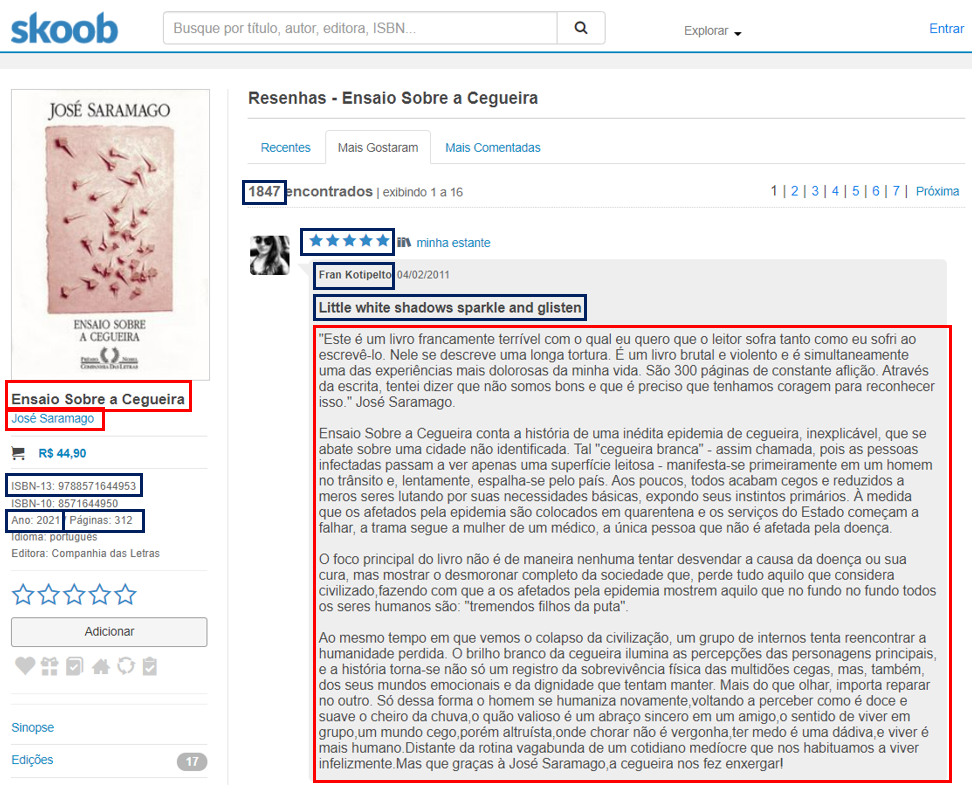

A respeito dessas informações, é importante destacar dois pontos. Será necessário obter ou gerar um ID para o usuário que fez a resenha, respeitando a LGPD e omitindo o nome dos mesmos. Faremos também uma investigação em mais detalhes do ano de lançamento do livro, uma vez que o livro em questão, Ensaio Sobre a Cegueira, foi lançado em 1995 e não em 2021 como mostra a figura.

A partir da página do livro, completamos as informações inicialmente desejadas e temos também outras informações interessantes de se obter, para definição futura se serão ou não utilizadas:
- Descrição
- Gêneros
- Nota média dada pelos usuários
- Quantidade de avaliações (notas) feitas
- Número de usuários que marcaram que leram
- Número de usuários que marcaram que estão lendo
- Número de usuários que marcaram que querem ler
- Número de usuários que marcaram que estão relendo
- Número de usuários que marcaram que abandonaram a leitura
- Quantidade total de resenhas feitas no Skoob

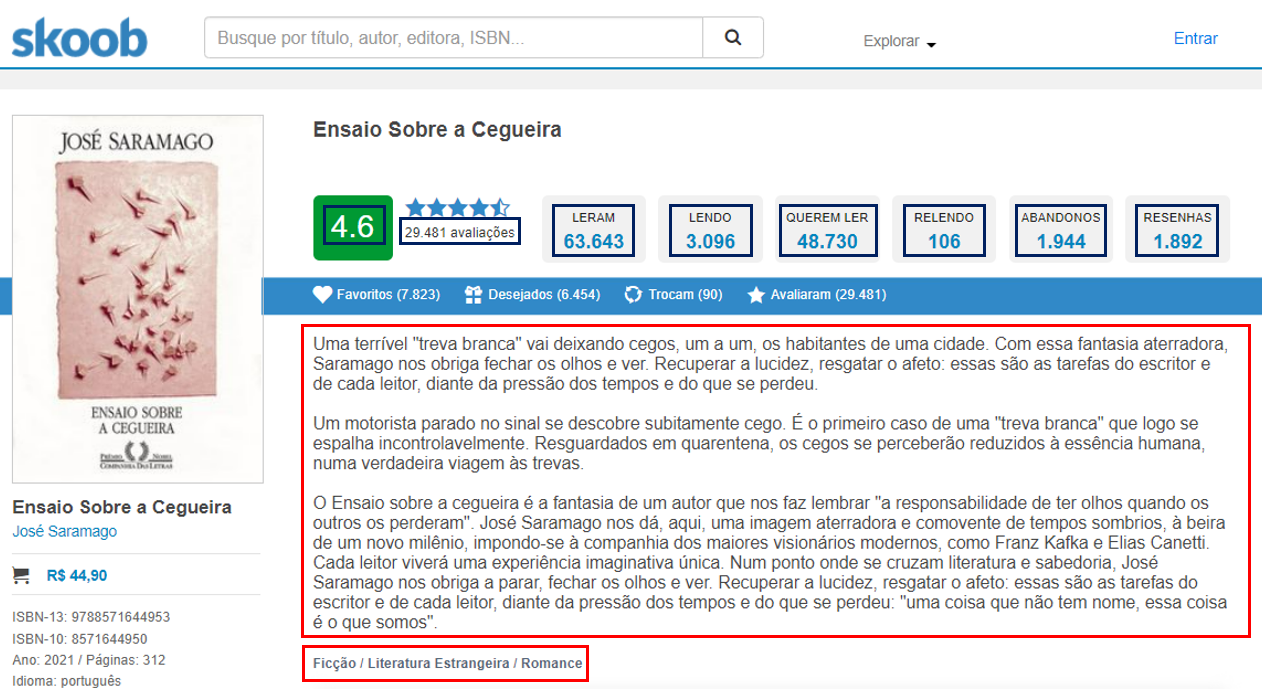

É interessante notar que a quantidade de resenhas disponíveis quando buscamos as resenhas do livro não é necessariamente igual à quantidade de resenhas já feitas. 

Por fim, uma vez que foi observada uma diferença entre a data de lançamento encontrada e a data de lançamento real do livro, decidi encontrar a página relativa às diferentes edições do livro (https://www.skoob.com.br/livro/edicoes/1/). Nele, podemos obversar que existem diferentes edições, cada uma com sua respectiva data de lançamento. Para obter a data de lançamento real será necessário obter aquela de menor valor, que no caso de Ensaio Sobre a Cegueira é, como dito antes, 1995.

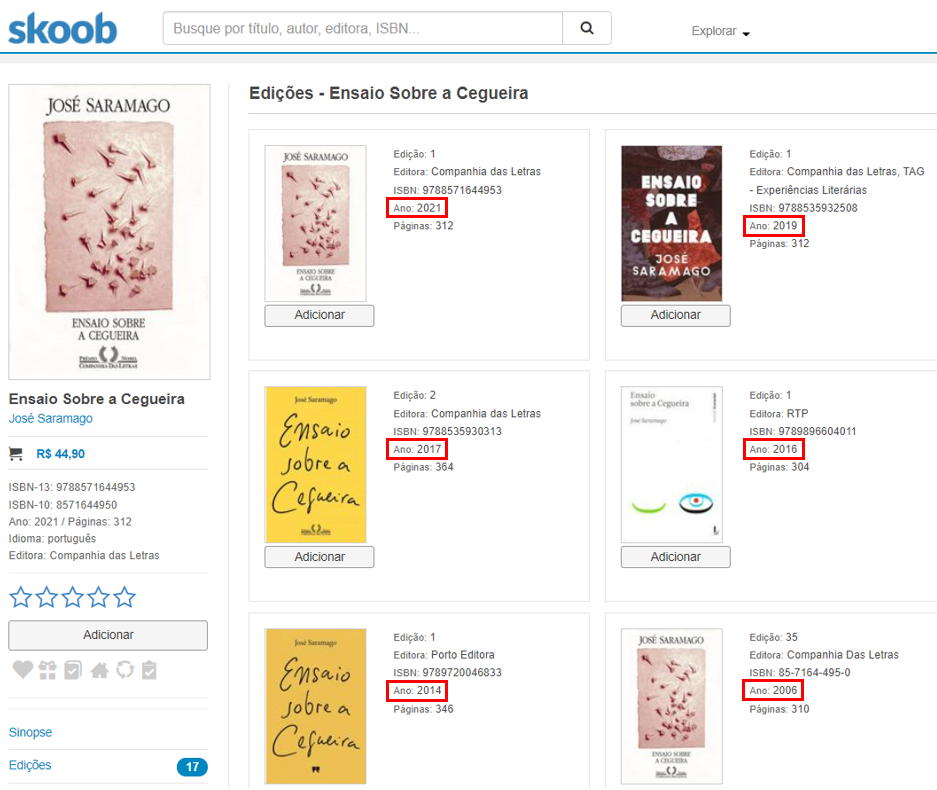



## 3. Estrutura do Skoob e Desenvolvimento das Funções <a name="development"></a>

Uma vez definidas as informações a serem obtidas e as páginas de web onde elas se encontram, foi feito em paralelo uma análise da estrutura HTML da página e o desenvolvimento de funções para obter as informações desejadas.

Para isso, iremos tanto avaliar as páginas utilizando a "Ferramenta de Desenvolvedor" disponível no navegador de internet quanto obter o HTML do site para investigar seus elementos. Portanto, importaremos algumas bibliotecas que faremos uso.

In [4]:
# Bibliotecas de manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas de  Web Scrapping 
import requests
from bs4 import BeautifulSoup

### Dados iniciais do livro

Analisando a estrutura do HTML vemos que as informações iniciais do livro, disponíveis na página da resenha, se encontram no bloco destacado na figura abaixo, exceto a quantidade de resenhas encontradas.

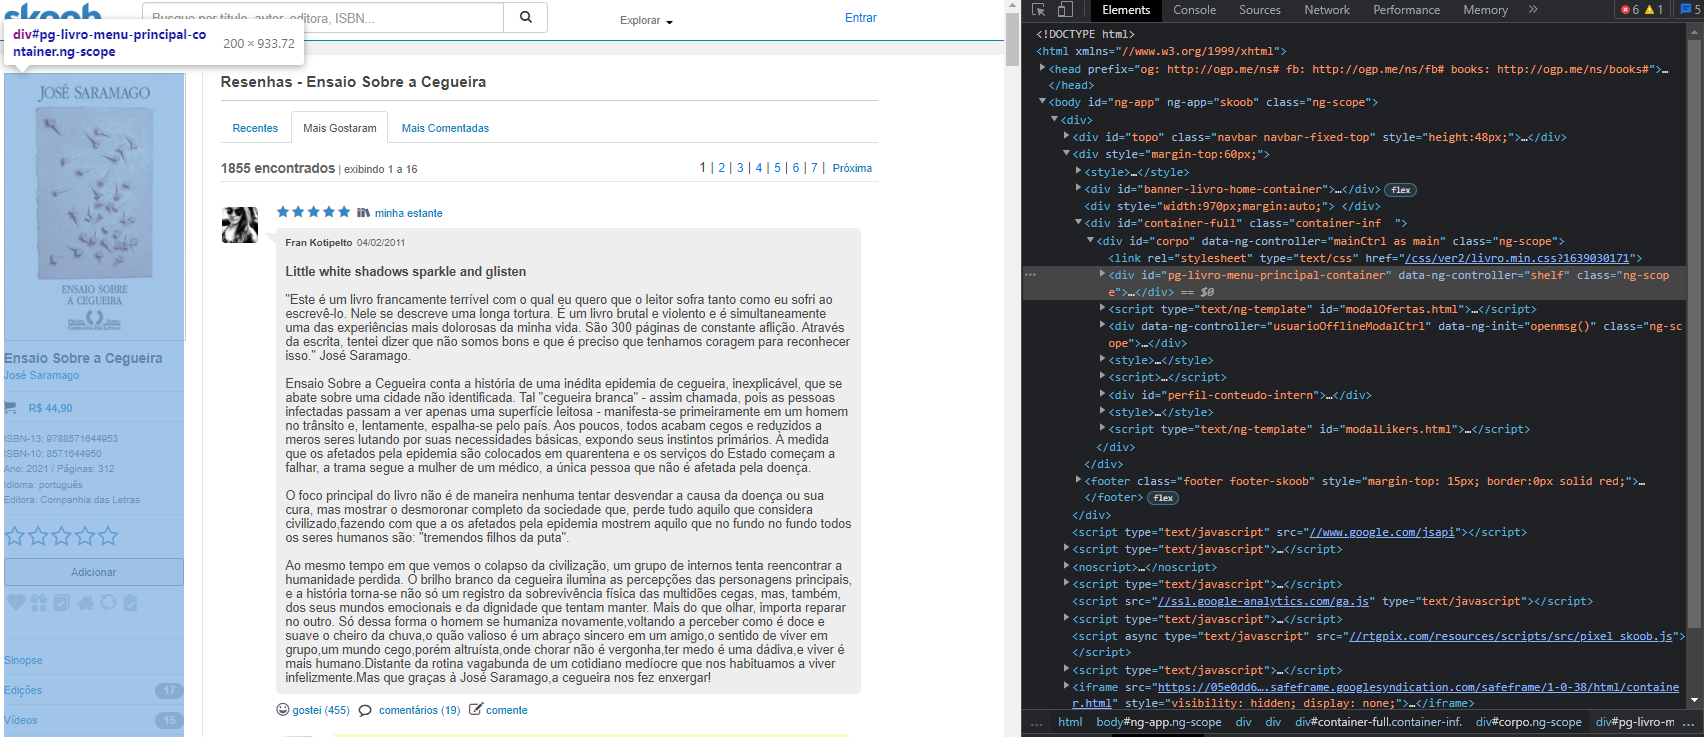


A mesma estrutura observada pode ser obtida rodando o codigo abaixo (que estará comentando, evitando-o, por criar centenasd de linhas do código que compõe a página do skoob).

In [2]:
'''response = requests.get('https://www.skoob.com.br/livro/resenhas/1/mais-gostaram/mpage:1')
 pagina_html = BeautifulSoup(response.content)
 print(pagina_html.prettify())'''

"response = requests.get('https://www.skoob.com.br/livro/resenhas/1/mais-gostaram/mpage:1')\n pagina_html = BeautifulSoup(response.content)\n print(pagina_html.prettify())"

A partir destas informações, foi desenvolvida a função "dados_iniciais_livro(i)", onde i representa o número de identificação do livro. Foram feitos testes com diferentes livros para se garantir a robustez da função, muitas vezes fazendo uso das funções Try  e Except.

A maior parte das informações se encontram no bloco "pg-livro-menu-principal-container".

1. Título do livro
    - Classe 'sidebar-titulo'. Quando não disponível não há livro cadastrado naquele número de referência, portanto, retornará um erro.
2. Autor
    - A forma mais robusta encontrada foi utilizar uma combinação de Try com If. 
    - Para autores mais conhecidos, o Skoob possui uma página dedicada para o autor, assim, o seu nome seria, na página de resenhas, um hiperlink para a página do próprio autor. 
    - Para autores que não possuem página própria a busca anterior dará um erro ou resultará  em "\n\n" ou "\nR$ \n", uma vez que o nome estará em itálico ao invés de hiperlink
3. ISBN-13
    - Quando disponível, será obtido através da classe 'sidebar-desc', sendo o primeiro span existente
4. Ano de lançamento
    - O ano de lançamento disponível (não necessáriamente da primeira edição) também se encontra na classe 'sidebar-desc'. A informação é sempre precedida de "Ano:" e procedida por uma barra "/" que irá dividir a próxima informação. Usaremos essas características para obter apenas o ano.
5. Número de páginas
    - Novamente, disponível na classe 'sidebar-desc', precedida por "Páginas:" e procedida por um espaço " ". Usaremos essas características para obter apenas o número de páginas.
6. Quantidade de resenhas encontradas
    - A quantidade de resenhas encontradas é uma informação que pode mudar, a depender de novas resenhas serem adicionadas ou serem deletadas. Diferentemente do restante, ela não se encontra no "pg-livro-menu-principal-container", portanto, a melhor forma de obtê-la é através da classe 'contador' dentro do corpo principal. 

In [6]:
def dados_iniciais_livro(i):
    
    # função para obter informações iniciais do livro utilizando a numeração de identificação do mesmo no site Skoob.
    # informações iniciais obtidas:
    # Livro, Autor, ISBN-13, Ano de lançamento, páginas do livro, total de resenhas disponíveis, url da página de resenhas
    
    url_resenha = 'https://www.skoob.com.br/livro/resenhas/{}/mais-gostaram/mpage:1'.format(i) 
    # página do Skoob em que constam as resenhas, em que o primeiro {} será o número do livro e
    # o segundo {} a página de reviews
    
    response = requests.get(url_resenha)
    pagina_html = BeautifulSoup(response.content)  
    corpo_completo = pagina_html.find(id="corpo")
    corpo = corpo_completo.find(id='pg-livro-menu-principal-container') 
    # corpo da página a ser feita a raspagem de dados (Web Scraping)  
    
    Livro = corpo.find('strong',{'class':'sidebar-titulo'}).get_text()
    
    try: 
        # Nome do Autor na maior parte dos casos está em um hiperlink para a página do autor
        Autor = corpo.findAll('a')[1].get_text()   
    except:
        Autor = None # Caso não obtenha retorno, salvar None
    if (Autor == '\nR$ \n') or (Autor == '\n\n') or (Autor==None): 
        # nos casos em que o nome do autor não possui um hiperlink, obteremos uma das informações acima ao invés do nome do autor
        try:
            Autor = corpo.find('i').get_text()  # nestes casos, um find i seria necessário
        except:
            None
        
    try:
        ISBN_13 = corpo.find('div', {"class": "sidebar-desc"}).find('span').get_text() # obter ISBN do livro
    except:
        ISBN_13 = None 
        
    try:
        lancamento = int(corpo.find('div', {"class": "sidebar-desc"}).get_text().split('Ano: ')[-1].split(' /',1)[0])
    except:
        lancamento = None
    
    try:
        Paginas = int(corpo.find('div', {"class": "sidebar-desc"}).get_text().split('Páginas: ')[-1].split(' ',1)[0])    
    except:
        Paginas = None
        
    try: # obter o total de resenhas disponíveis, para identificar o range necessário para obter todas as resenhas
        total_resenhas = int(corpo_completo.find('div',{'class' :'contador'}).find('b').get_text().split(' ')[0])
    except:
        total_resenhas = 0
    
    print('Livro {}: {}'.format(i, Livro))
        
    return(Livro, Autor, ISBN_13, lancamento, Paginas, total_resenhas, url_resenha)

Testaremos abaixo para alguns livros específicos.

In [7]:
print(dados_iniciais_livro(1))
print(dados_iniciais_livro(2))

Livro 1: Ensaio Sobre a Cegueira
('Ensaio Sobre a Cegueira', 'José Saramago', '9788571644953', 2021, 312, 1895, 'https://www.skoob.com.br/livro/resenhas/1/mais-gostaram/mpage:1')
Livro 2: O Caçador de Pipas
('O Caçador de Pipas', 'Khaled Hosseini', '9788520917671', 2005, 365, 1856, 'https://www.skoob.com.br/livro/resenhas/2/mais-gostaram/mpage:1')


### Detalhes do livro 

Após obtenção do nome do livro, é possível acessar a página do mesmo, para raspar a descrição, gêneros e informações pertinentes à interação dos usuários com o livro no Skoob.

Para acessar a página é preciso um leve tratamento no título, removendo letras maíusculas e pontuações e substituindo espaçamentos por um hífem (-). Para tal, usaremos a biblioteca string.

Todo o corpo com o conteúdo que será obtido nesta etapa se encontra no bloco "pg-livro-principal-container". 

1. Descrição
    - A descrição é obtida através de "livro-perfil-sinopse-txt"
    - Para os livros que possuírem gênero, o gênero aparece ao final da resenha, sendo assim, é necessário separar as informações 
2. Gêneros
    - Como dito acima, os gêneros se encontram ao final da descrição, sendo necessário um 'split' para separá-los.
3. Nota média dada pelos usuários
    - A nota média é obtida em "pg-livro-box-rating"
    - A informação deve ser convertida para float
4. Quantidade de avaliações (notas) feitas
    - O total de avaliações é obtido em "pg-livro-box-rating-avaliadores-numero"
    - É necessário remover o ponto utilizado para marcar "milhares", para padronizar a numeração, assim como convertê-lo em inteiros
5. Número de usuários que marcaram que leram
    - Desta informação em diante, todas se encontram através da classe "bar", do primeiro ao sexto elemento encontrado
    - Em todos é necessária a padronização da numeração e conversão para inteiros
6. Número de usuários que marcaram que estão lendo
7. Número de usuários que marcaram que querem ler
8. Número de usuários que marcaram que estão relendo
9. Número de usuários que marcaram que abandonaram a leitura
10. Quantidade total de resenhas feitas no Skoob
    - É interessante notar que esta informação difere da encontrada anteriormente na página de resenhas, indicando o número total de resenhas já feitas, mesmo que não estejam disponíveis


In [8]:
import string # Biblioteca para lidar com strings

In [9]:
def detalhes_do_livro(i, Livro):
    
    # função para obter um maior detalhamento do livro, com informações do skoob
    # Descricao, gêneros, Rating médio, Avaliações, total de resenhas, usuários que abandonaram a leitura
    # usuários relendo, usuários que querem_ler, usuários lendo, usuários que leram, url do detalhe do livro
    
    titulo_tratado = Livro # tratar o titulo, retirando pontuações dos titulos, que não são utilizados no link
    for c in string.punctuation:
        titulo_tratado = titulo_tratado.replace(c,'').lower()
    
    # link dos detalhes de cada livro é composto pelo titulo, com um hifem entre palavras
    # e pelo numero de identificação do livro no site
    url_livro = ('https://www.skoob.com.br/'+ titulo_tratado + '-' + str(i)).replace(' ','-').replace('--','-')
    
    response2 = requests.get(url_livro)
    pagina_html2 = BeautifulSoup(response2.content)
    # corpo da página a ser feita a raspagem de dados (Web Scraping)
    corpo2 = pagina_html2.find(id='pg-livro-principal-container')
    
    Rating = float(corpo2.find(id="pg-livro-box-rating").find('span').get_text())
    Avaliacoes = int(corpo2.find(id="pg-livro-box-rating-avaliadores-numero").get_text().split(' ')[0].replace('.',''))
    
    total_resenhas_real = int(corpo2.findAll('div',{'class':'bar'})[0].findAll('a')[1].get_text().replace('.',''))
    abandonos = int(corpo2.findAll('div',{'class':'bar'})[1].findAll('a')[1].get_text().replace('.',''))
    relendo = int(corpo2.findAll('div',{'class':'bar'})[2].findAll('a')[1].get_text().replace('.',''))
    querem_ler = int(corpo2.findAll('div',{'class':'bar'})[3].findAll('a')[1].get_text().replace('.',''))
    lendo = int(corpo2.findAll('div',{'class':'bar'})[4].findAll('a')[1].get_text().replace('.',''))
    leram = int(corpo2.findAll('div',{'class':'bar'})[5].findAll('a')[1].get_text().replace('.',''))
    
    try:
        descricao = corpo2.find(id='livro-perfil-sinopse-txt').find('p').get_text()
    except:
        descricao = None
    
    try: # procurar encontrar um gênero, caso exista, encontar a descrição 
        generos = corpo2.find(id='livro-perfil-sinopse-txt').find('span').get_text()
        descricao = descricao.split(generos)[0] # remover generos da descrição
        generos = generos.strip().split(' / ') # gerar uma lista com os diversos gêneros
    except:
        generos = None

    return(descricao, generos, Rating, Avaliacoes, total_resenhas_real, abandonos, relendo, querem_ler, lendo, leram, url_livro)

In [10]:
detalhes_do_livro(1, 'Ensaio Sobre a Cegueira')

('\nUma terrível "treva branca" vai deixando cegos, um a um, os habitantes de uma cidade. Com essa fantasia aterradora, Saramago nos obriga fechar os olhos e ver. Recuperar a lucidez, resgatar o afeto: essas são as tarefas do escritor e de cada leitor, diante da pressão dos tempos e do que se perdeu.Um motorista parado no sinal se descobre subitamente cego. É o primeiro caso de uma "treva branca" que logo se espalha incontrolavelmente. Resguardados em quarentena, os cegos se perceberão reduzidos à essência humana, numa verdadeira viagem às trevas.O Ensaio sobre a cegueira é a fantasia de um autor que nos faz lembrar "a responsabilidade de ter olhos quando os outros os perderam". José Saramago nos dá, aqui, uma imagem aterradora e comovente de tempos sombrios, à beira de um novo milênio, impondo-se à companhia dos maiores visionários modernos, como Franz Kafka e Elias Canetti. Cada leitor viverá uma experiência imaginativa única. Num ponto onde se cruzam literatura e sabedoria, José Sar

### Data de lançamento

Como vimos que a data de lançamento encontrada na página de resenhas não é necessariamente o lançamento original, usaremos a página do Skoob com as edições para buscar o livro que tiver a mais antiga data. 

A função terá como entrada o número de identificação do livro e o ano de lançamento encontrado anteriormente. 

Primeiro é encontrado o total de edições existente, então iterando dentre elas obtemos uma lista com os anos de lançamento.
Caso o valor mínimo na lista seja menor que a data obtida inicialmente, atualizar o valor para o menor ano.


In [11]:
def data_de_lancamento(i, lancamento):
    
    # função para procurar a data de lançamento "correta"
    # o dado obtido anteriormente não necessariamente é a da primeira edição lançada
    # procurar dentre as diversas edições a que tiver a menor data de lançamento
    
    url_edicoes = 'https://www.skoob.com.br/livro/edicoes/'+str(i)
    
    response3 = requests.get(url_edicoes)
    pagina_html3 = BeautifulSoup(response3.content)
    corpo3 = pagina_html3.find('div',{'style':'margin-top:10px;'}) # corpo da página em que se encontram as edições
    
    numero_edicoes = len(corpo3.findAll('div',{'style':'float:left; width:180px;'}))
    lancamentos = []
    for edicoes in range(0,numero_edicoes):
        lancamentos.append(int(corpo3.findAll('div',{'style':'float:left; width:180px;'})[edicoes].get_text().split('Ano: ')[-1].split('Páginas:')[0]))
    try:
        if lancamento == None: # caso não houvesse dado disponível, obter o mínimo existente
            try:
                lancamento = min(lancamentos)
            except:
                pass
        elif min(lancamentos) < lancamento: # caso o menor valor disponível seja menor que o atual, substituir
            lancamento = min(lancamentos)
    except: 
        pass
        
    return(lancamento)

In [12]:
data_de_lancamento(1, 2021)

1995

### Resenhas

Nesta etapa o objetivo é criar uma lista de dicionários, com um dicionário por resenha.<br>
Para cada resenha, salvaremos o número do livro sendo scrapeado, o ID da resenha, o ID do usuário que fez a resenha, a página do Skoob com a resenha (dentre as páginas com resenha daquele livro), a posição da resenha na página (sendo salvo apenas para identificar mais facilmente em casos de problemas), a nota dada pelo usuário, o título da resenha e a resenha em si.

Os dados de entrada da função serão o número do livro (para gerar o link de acesso à página de resenhas do livro), o título do livro, o número total de resenhas disponíveis encontrado anteriormente. Além disso, duas informações deve ser definidas de acordo com o desenho de quem realiza a raspagem dos dados: o limite de resenhas por livro que se deseja obter e se deseja ou não imprimir a posição da resenha sendo obtida, para acompanhar o andamento da raspagem. No desenvolvimento da raspagem foi fundamental ter a possibilidade de ver em que posição a raspagem estava ocorrendo, para identificar e corrigir os erros quando ocorressem.

Com base no número de resenhas disponíveis, calcula-se o número de páginas de resenhas, uma vez que há como padrão 15 resenhas por página. 

Caso o limite de resenhas tenha sido definido como 0, todas as resenhas serão obtidas.<br>
Caso contrário, será feita uma verificação se existem mais páginas do que o necessário para atingir o limite de resenhas. Se for verdade, o valor total de páginas será atualizado para o valor suficiente para obter o limite desejado.

Definimos neste ponto um contador do número de resenhas raspadas para este livro.

É criado um FOR para iterar através das diferentes páginas de resenhas até o final ou o limite estabelecido. Em cada página, verifica-se quantas resenhas deverão ser obtida nesta página para atingir o limite. 

Cada resenha é encontrada dentro do ID "perfil-conteudo-intern", através de uma busca por todos os itens "div" iniciados por "review", uma vez que cada resenha tem como "div" o a palavra 'review' seguida pelo número de identificação da mesma. 
Então, as informações a seguir podem ser obtidas:

1. ID da Resenha
2. ID do usuário
3. Nota da resenha
- Obtido através de 'star-rating'
4. Resenha
- Para se obter o texto da resenha, é necessário um pré processamento do texto obtido. 
- Inicialmente, temos um texto que contém o nome do autor, a data de postagem, o título da resenha, o texto da resenha, e um site que pode ter sido fornecido pelo usuário.
- É preciso portanto separar as informações, removendo o que não desejamos salvar, de modo a ter apenas o texto e o título.
5. Título da resenha
- Nos casos em que não há um título, é salvo como None.

Por fim, é gerado um dicionário para a resenha com todas as informações desejadas, adicionando a uma lista, de modo que temos ao final uma única lista em que cada item é um dicionário relativo à uma resenha. 

Caso o usuário deseje imprimir o andamento, será impresso o Livro, a página da resenha e a posição da resenha na página, conforme é scrapeada.

In [35]:
import math # Biblioteca para funções matemáticas

In [14]:
def obter_resenhas(i, Livro, total_resenhas, limite_resenhas, imprimir):
    
    lista_reviews = [] # lista com output de todas as reviews coletadas
    
    url_resenha = 'https://www.skoob.com.br/livro/resenhas/{}/mais-gostaram/mpage:{}'
    
    total_pags = math.ceil(total_resenhas/15)
    
    if limite_resenhas == 0: # se limite for definido como 0, pegará todas os comentários existentes
        pass   
    elif total_pags > math.ceil(limite_resenhas/15): # se houverem mais páginas que as necessárias para encontrar o limite
        total_pags = math.ceil(limite_resenhas/15) # limitará as páginas de modo a limitar o total de comentários
    else:
        pass # se limite_resenhas não for 0 nem maior que o existente, teremos menos reviews que o desejado, portanto pegaremos todos os disponíveis
    
    contador_reviews  = 0 # definindo um contador de comentários por livro
        
    for paginas_de_resenha in range(1,total_pags+1): # range das páginas com comentários, seguindo limite caso tenha sido definido
        response4 = requests.get(url_resenha.format(i,paginas_de_resenha))
        pagina_html4 = BeautifulSoup(response4.content)
        corpo4 = pagina_html4.find(id="corpo") # corpo das reviews de cada página  
        
        
        if imprimir: # se True, irá printar o livro e página que está sendo coletado
            print('Livro {}: {} - Página: {}'.format(i, Livro, paginas_de_resenha)) # printando página da review, para identificar casos de bug

        # existem até 15 reviews por página, cada uma com o ID da review aparecendo 2x, portanto
        # o range padrão de coleta de reviews por página vai de 0 a 29, pulando de 2 em 2
        # no entanto, possívelmente ele foi limitado    
    
        if (paginas_de_resenha == math.ceil(limite_resenhas/15) and limite_resenhas!= 0): # se a página atual for a mesma definida ao limitar o numero de reviews
            ultima_review = (limite_resenhas - contador_reviews)*2 # encontrar quantas reviews ainda serão coletadas para atingir limite definido
            # multiplicar por 2 uma vez que pularemos de 2 em 2    
        else:
            ultima_review = 30 # se nao estiver no limite definido, usará o range completo das reviews 
            
        for resenhas in range(0,ultima_review,2):
            try: # testar se existe reviews nesta posição, uma vez que se o total não tiver sido limitado,
                # na última página de reviews pode haver menos de 15 reviews
                if imprimir: # se True, irá printar o livro e página e review que está sendo coletado
                    print('Livro {}: {} - Página: {} - Review: {}'.format(i, Livro, paginas_de_resenha,int(resenhas/2+1))) # printando a posição da review, para identificar casos de bug
                          
                # dados gerais da resenha    
                review_pt1 = corpo4.findAll(id="perfil-conteudo-intern")[0].findAll("div", id=lambda value: value and value.startswith("resenha"))[resenhas]
                id_resenha = review_pt1.get('id') # ID da review
                id_usuario = review_pt1.find('a').get('href').split('/')[-1] # ID do usuário
                nota = float(review_pt1.find('star-rating').get('rate')) # Nota dada pelo usuário
                           
                # dados de texto da resenha
                review_pt2 = corpo4.find(id="perfil-conteudo-intern").findAll("div", id=lambda value: value and value.startswith("resenha"))[resenhas+1]
                            
                resenha = review_pt2.get_text() # obtendo o texto que consta título, data e resenha  
                
                if 'site: ' in resenha:
                    if len(review_pt2.findAll('strong'))==2:
                        titulo = None
                        resenha = resenha.split('/',2)[-1][4:]
                        resenha = resenha.split('site: ')[0]
                    elif len(review_pt2.findAll('strong'))==3:
                        titulo = review_pt2.findAll('strong')[1].get_text()
                        resenha = resenha.split(titulo,1)[-1] 
                        resenha = resenha.split('site: ')[0]
                else:
                    try: # caso exista um título, salvar ele separadamente
                        titulo = review_pt2.findAll('strong')[1].get_text()
                        resenha = resenha.split(titulo,1)[-1] 
                    except IndexError: # caso não exista um título, salvar None
                        titulo = None
                        resenha = resenha.split('/',2)[-1][4:]
                if resenha == ' ':
                    resenha = titulo
                    titulo = None              
                
                contador_reviews+=1
                
                lista_reviews.append({'numero_do_livro':i,
                                      'review_id': id_resenha,
                                      'user_id': id_usuario,
                                      'pagina_do_skoob' : paginas_de_resenha,
                                      'posicao_na_pagina' : (resenhas/2+1),
                                      'rating': nota,
                                      'review_title': titulo,
                                      'review': resenha})
            except:
                break
                
    return(lista_reviews)

In [15]:
obter_resenhas(1, 'Ensaio Sobre a Cegueira', 1845, 5, True)

Livro 1: Ensaio Sobre a Cegueira - Página: 1
Livro 1: Ensaio Sobre a Cegueira - Página: 1 - Review: 1
Livro 1: Ensaio Sobre a Cegueira - Página: 1 - Review: 2
Livro 1: Ensaio Sobre a Cegueira - Página: 1 - Review: 3
Livro 1: Ensaio Sobre a Cegueira - Página: 1 - Review: 4
Livro 1: Ensaio Sobre a Cegueira - Página: 1 - Review: 5


[{'numero_do_livro': 1,
  'review_id': 'resenha8521829',
  'user_id': '281809-fran-kotipelto',
  'pagina_do_skoob': 1,
  'posicao_na_pagina': 1.0,
  'rating': 5.0,
  'review_title': 'Little white shadows sparkle and glisten',
  'review': '\n"Este é um livro francamente terrível com o qual eu quero que o leitor sofra tanto como eu sofri ao escrevê-lo. Nele se descreve uma longa tortura. É um livro brutal e violento e é simultaneamente uma das experiências mais dolorosas da minha vida. São 300 páginas de constante aflição. Através da escrita, tentei dizer que não somos bons e que é preciso que tenhamos coragem para reconhecer isso." José Saramago.\n\nEnsaio Sobre a Cegueira conta a história de uma inédita epidemia de cegueira, inexplicável, que se abate sobre uma cidade não identificada. Tal "cegueira branca" - assim chamada, pois as pessoas infectadas passam a ver apenas uma superfície leitosa - manifesta-se primeiramente em um homem no trânsito e, lentamente, espalha-se pelo país. Aos 

### Função principal de raspagem do Skoob

Por fim, uma função única capaz de realizar todas as etapas foi desenvolvida, tendo como entrada a faixa dos livros que se deseja obter resenhas, a quantidade máxima de resenhas por livro e se deseja-se imprimir ou não o andamento da função.

Começa-se importanto as bibliotecas necessárias. <br>
Então, através de um iterador cada livro será scrapeado. Caso não exista um livro na posição, simplesmente pulará para o seguinte.<br>
Para se evitar que a raspagem seja interrompida (gerando um erro e perdendo os dados colhidos) em caso de falta de acesso à internet, criou-se um 'While True' para se garantir a continuidade mesmo em caso dos erros 'ConnectionError' e 'ChunkedEncodingError'. <br>
A ordem de obtenção dos dados é:
1. Dados iniciais
2. Detalhamento do livro
3. Correção da data de lançamento
4. Resenhas 
- Caso não existam resenhas, pulará para o livro seguinte

Então, todas as informações coletadas serão salvas num dicionário por livro e adicionados a uma lista de dicionários, que pode facilmente ser convertido para um dataframe.

In [19]:
def raspar_skoob(livro_inicial, livro_final, limite_resenhas,imprimir):
    '''livro_inicial: primeiro livro a ser coletado (número inteiro não nulo)
    livro_final: ultimo livro a ser coletado, incluindo-o (sendo necessáriamente um número maior que o do livro_inicial)
    limite_resenhas: limite de reviews a serem coletados. 
        Caso o valor seja menor que o número de reviews existentes, ele limitárá o total
        Caso insira um valor maior que o número de reviews disponíveis, ele pegará o máximo existente
        Caso não deseje limitar, inserir o valor 0
    imprimir: se True, irá printar os estágios, se False, não irá printar os estágios'''
    import pandas as pd
    import numpy as np

    #pd.set_option('display.max_colwidth', None)
    pd.set_option('display.max_columns',None)

    # Bibliotecas de  Web Scrapping 
    import requests
    from bs4 import BeautifulSoup

    import math # Biblioteca para funções matemáticas
    import string # Biblioteca para lidar com strings
    import time # Biblioteca para lidar com data
    
    print (time.asctime(time.localtime(time.time())))
    print('\n')
        
    lista_livros = [] # lista dos livros coletados    
    
    # range da lista de livros, começando no livro_inicial até livro_final, em que será feita a coleta
    for i in range(livro_inicial,livro_final+1):     
        while True: # enquanto for true, seguira tentando obter os dados daquele único livro i
            try: # testar se existe um livro naquela posição, caso não exista simplesmente passará para o próximo livro
                lista_reviews=[]
                
                # chamar a função dados_iniciais_livro
                Livro, Autor, ISBN_13, lancamento, Paginas, total_resenhas, url_resenha = dados_iniciais_livro(i)
                
                # chamar a função detalhes_do_livro
                descricao, generos, Rating, Avaliacoes, total_resenhas_real, abandonos, relendo, querem_ler, lendo, leram, url_livro = detalhes_do_livro(i, Livro) 
                
                # chamar a função da data_de_lancamento
                lancamento = data_de_lancamento(i, lancamento)                                             
                
                if total_resenhas != 0: # caso existam resenhas para este livro
                    lista_reviews = obter_resenhas(i, Livro, total_resenhas, limite_resenhas, imprimir)                      
                    
                else: # caso não exista nenhuma resenha 
                    break
                # Salvar o livro após coleta
                lista_livros.append({'autor':Autor,
                                     'titulo':Livro,
                                     'numero_do_livro':i,
                                     'generos':generos,
                                     'data_lancamento':lancamento,
                                     'ISBN_13':ISBN_13,
                                     'paginas':Paginas,
                                     'nota_media':Rating,
                                     'total_de_avaliacoes':Avaliacoes,
                                     'leram':leram,
                                     'lendo':lendo,
                                     'querem_ler':querem_ler,
                                     'relendo':relendo,
                                     'abandonos':abandonos,
                                     'total_resenhas':total_resenhas_real,
                                     'url_livro':url_livro,
                                     'url_resenha':url_resenha,
                                     'descricao':descricao,
                                     'reviews':lista_reviews
                                    })
                break
                    
                    
            except IndexError: # caso não exista um livro nesta página, passar para próximo livro
                break  
            except requests.exceptions.ConnectionError: # caso dê erro de internet, continuar tentando até a internet voltar
                continue        
            except requests.exceptions.ChunkedEncodingError: # caso dê erro de internet, continuar tentando até a internet voltar
                continue           
            except AttributeError:
                break
    print('\n')
    print (time.asctime(time.localtime(time.time())))    
    return(lista_livros)

Verificando a raspagem completa dos livros 1, 2 e 3, obtendo 2 resenhas de cada.

In [20]:
livros = raspar_skoob(1,3,2,True)

Sun May  8 21:24:48 2022


Livro 1: Ensaio Sobre a Cegueira
Livro 1: Ensaio Sobre a Cegueira - Página: 1
Livro 1: Ensaio Sobre a Cegueira - Página: 1 - Review: 1
Livro 1: Ensaio Sobre a Cegueira - Página: 1 - Review: 2
Livro 2: O Caçador de Pipas
Livro 2: O Caçador de Pipas - Página: 1
Livro 2: O Caçador de Pipas - Página: 1 - Review: 1
Livro 2: O Caçador de Pipas - Página: 1 - Review: 2
Livro 3: O Alquimista
Livro 3: O Alquimista - Página: 1
Livro 3: O Alquimista - Página: 1 - Review: 1
Livro 3: O Alquimista - Página: 1 - Review: 2


Sun May  8 21:24:58 2022


In [21]:
livros

[{'autor': 'José Saramago',
  'titulo': 'Ensaio Sobre a Cegueira',
  'numero_do_livro': 1,
  'generos': ['Ficção', 'Literatura Estrangeira', 'Romance'],
  'data_lancamento': 1995,
  'ISBN_13': '9788571644953',
  'paginas': 312,
  'nota_media': 4.6,
  'total_de_avaliacoes': 29770,
  'leram': 64097,
  'lendo': 3152,
  'querem_ler': 49257,
  'relendo': 107,
  'abandonos': 1962,
  'total_resenhas': 1940,
  'url_livro': 'https://www.skoob.com.br/ensaio-sobre-a-cegueira-1',
  'url_resenha': 'https://www.skoob.com.br/livro/resenhas/1/mais-gostaram/mpage:1',
  'descricao': '\nUma terrível "treva branca" vai deixando cegos, um a um, os habitantes de uma cidade. Com essa fantasia aterradora, Saramago nos obriga fechar os olhos e ver. Recuperar a lucidez, resgatar o afeto: essas são as tarefas do escritor e de cada leitor, diante da pressão dos tempos e do que se perdeu.Um motorista parado no sinal se descobre subitamente cego. É o primeiro caso de uma "treva branca" que logo se espalha incontrol

## 4. Raspagem de Dados<a name="webscraping"></a>

Faremos uma raspagem exemplo de 5 livros, com 4 resenhas de cada livro, printando o andamento da raspagem.

In [26]:
livros = raspar_skoob(1,5,4,True)

Sun May  8 21:25:31 2022


Livro 1: Ensaio Sobre a Cegueira
Livro 1: Ensaio Sobre a Cegueira - Página: 1
Livro 1: Ensaio Sobre a Cegueira - Página: 1 - Review: 1
Livro 1: Ensaio Sobre a Cegueira - Página: 1 - Review: 2
Livro 1: Ensaio Sobre a Cegueira - Página: 1 - Review: 3
Livro 1: Ensaio Sobre a Cegueira - Página: 1 - Review: 4
Livro 2: O Caçador de Pipas
Livro 2: O Caçador de Pipas - Página: 1
Livro 2: O Caçador de Pipas - Página: 1 - Review: 1
Livro 2: O Caçador de Pipas - Página: 1 - Review: 2
Livro 2: O Caçador de Pipas - Página: 1 - Review: 3
Livro 2: O Caçador de Pipas - Página: 1 - Review: 4
Livro 3: O Alquimista
Livro 3: O Alquimista - Página: 1
Livro 3: O Alquimista - Página: 1 - Review: 1
Livro 3: O Alquimista - Página: 1 - Review: 2
Livro 3: O Alquimista - Página: 1 - Review: 3
Livro 3: O Alquimista - Página: 1 - Review: 4
Livro 4: Fernão Capelo Gaivota
Livro 4: Fernão Capelo Gaivota - Página: 1
Livro 4: Fernão Capelo Gaivota - Página: 1 - Review: 1
Livro 4: Fernão Capelo

In [27]:
df_livros = pd.DataFrame(livros)

Com os dados obtidos e o dataframe inicial gerado, podemos ver todas as informações, tendo as resenhas do livro como uma lista de dicionários dentro de uma coluna do dataframe.

In [28]:
df_livros

,autor,titulo,numero_do_livro,generos,data_lancamento,ISBN_13,paginas,nota_media,total_de_avaliacoes,leram,lendo,querem_ler,relendo,abandonos,total_resenhas,url_livro,url_resenha,descricao,reviews
0,José Saramago,Ensaio Sobre a Cegueira,1,"[Ficção, Literatura Estrangeira, Romance]",1995,9788571644953,312,4.6,29770,64097,3152,49257,107,1962,1940,https://www.skoob.com.br/ensaio-sobre-a-ceguei...,https://www.skoob.com.br/livro/resenhas/1/mais...,"\nUma terrível ""treva branca"" vai deixando ceg...","[{'numero_do_livro': 1, 'review_id': 'resenha8..."
1,Khaled Hosseini,O Caçador de Pipas,2,"[Drama, Literatura Estrangeira, Romance, Ficção]",2005,9788520917671,365,4.3,66706,219519,2304,75933,175,4214,1924,https://www.skoob.com.br/o-caçador-de-pipas-2,https://www.skoob.com.br/livro/resenhas/2/mais...,\nO caçador de pipas é considerado um dos maio...,"[{'numero_do_livro': 2, 'review_id': 'resenha4..."
2,Paulo Coelho,O Alquimista,3,"[Literatura Brasileira, Romance, Autoajuda, Fi...",1989,9788576651857,192,3.8,35846,117019,955,11320,129,1366,1324,https://www.skoob.com.br/o-alquimista-3,https://www.skoob.com.br/livro/resenhas/3/mais...,\nO jovem pastor Santiago tem um sonho que se ...,"[{'numero_do_livro': 3, 'review_id': 'resenha7..."
3,Richard Bach,Fernão Capelo Gaivota,4,"[Contos, Literatura Estrangeira]",1970,9788501060495,80,3.9,7663,15688,146,1741,37,143,276,https://www.skoob.com.br/fernão-capelo-gaivota-4,https://www.skoob.com.br/livro/resenhas/4/mais...,\nPara as pessoas que inventam suas próprias l...,"[{'numero_do_livro': 4, 'review_id': 'resenha1..."
4,J. J. Benítez,Operação Cavalo de Tróia 1,5,[Literatura Estrangeira],1987,9788572720168,568,4.1,3286,6730,513,2654,36,742,132,https://www.skoob.com.br/operação-cavalo-de-tr...,https://www.skoob.com.br/livro/resenhas/5/mais...,\nRelato de um militar e cientista norte-ameri...,"[{'numero_do_livro': 5, 'review_id': 'resenha6..."


Retiraremos o limite da dimensão das colunas para poder ver toda a informação.

In [29]:
pd.set_option('display.max_colwidth', None)

In [39]:
df_livros.head(2)

autor                   titulo  numero_do_livro  \
0    José Saramago  Ensaio Sobre a Cegueira                1   
1  Khaled Hosseini       O Caçador de Pipas                2   

                                            generos  data_lancamento  \
0         [Ficção, Literatura Estrangeira, Romance]             1995   
1  [Drama, Literatura Estrangeira, Romance, Ficção]             2005   

         ISBN_13  paginas  nota_media  total_de_avaliacoes   leram  lendo  \
0  9788571644953      312         4.6                29770   64097   3152   
1  9788520917671      365         4.3                66706  219519   2304   

   querem_ler  relendo  abandonos  total_resenhas  \
0       49257      107       1962            1940   
1       75933      175       4214            1924   

                                            url_livro  \
0  https://www.skoob.com.br/ensaio-sobre-a-cegueira-1   
1       https://www.skoob.com.br/o-caçador-de-pipas-2   

                                                       url_resenha  \
0  https://www.skoob.com.br/livro/resenhas/1/mais-gostaram/mpage:1   
1  https://www.skoob.com.br/livro/resenhas/2/mais-gostaram/mpage:1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   descricao  \
0  \nUma terrível "treva branca" vai deixando cegos, um a um, os habitantes de uma cidade. Com essa fantasia aterradora, Saramago nos obriga fechar os olhos e ver. Recuperar a lucidez, resgatar o afeto: essas são as tarefas do escritor e de cada leitor, diante da pressão dos tempos e do que se perdeu.Um motorista parado no sinal se descobre subitamente cego. É o primeiro caso de uma "treva branca" que logo se espalha incontrolavelmente. Resguardados em quarentena, os cegos se perceberão reduzidos à essência humana, numa verdadeira viagem às trevas.O Ensaio sobre a cegueira é a fantasia de um autor que nos faz lembrar "a responsabilidade de ter olhos quando os outros os perderam". José Saramago nos dá, aqui, uma imagem aterradora e comovente de tempos sombrios, à beira de um novo milênio, impondo-se à companhia dos maiores visionários modernos, como Franz Kafka e Elias Canetti. Cada leitor viverá uma experiência imaginativa única. Num ponto onde se cruzam literatura e sabedoria, José Saramago nos obriga a parar, fechar os olhos e ver. Recuperar a lucidez, resgatar o afeto: essas são as tarefas do escritor e de cada leitor, diante da pressão dos tempos e do que se perdeu: "uma coisa que não tem nome, essa coisa é o que somos".   
1                                                                                                                                                                                                                                                                                                                                \nO caçador

Para análises mais detalhadas é interessante separar o dataframe original em dois, um com as resenhas e outro com os livros, dataframes que se relacionarão através do número do livro, dado presente em ambas as tabelas.

Para isso, é necessário fazer um unpacking da lista de dicionários contida dentro do dataframe.

In [31]:
resenhas = pd.DataFrame(columns=['review_id','user_id','numero_do_livro','pagina_do_skoob','posicao_na_pagina','rating','review_title','review'])
for i, d in df_livros.reviews.iteritems():
    resenhas = pd.concat([resenhas,pd.DataFrame(d)],ignore_index=True)

In [37]:
resenhas.head(2)

,review_id,user_id,numero_do_livro,pagina_do_skoob,posicao_na_pagina,rating,review_title,review
0,resenha8521829,281809-fran-kotipelto,1,1,1.0,5.0,Little white shadows sparkle and glisten,"\n""Este é um livro francamente terrível com o qual eu quero que o leitor sofra tanto como eu sofri ao escrevê-lo. Nele se descreve uma longa tortura. É um livro brutal e violento e é simultaneamente uma das experiências mais dolorosas da minha vida. São 300 páginas de constante aflição. Através da escrita, tentei dizer que não somos bons e que é preciso que tenhamos coragem para reconhecer isso."" José Saramago.\n\nEnsaio Sobre a Cegueira conta a história de uma inédita epidemia de cegueira, inexplicável, que se abate sobre uma cidade não identificada. Tal ""cegueira branca"" - assim chamada, pois as pessoas infectadas passam a ver apenas uma superfície leitosa - manifesta-se primeiramente em um homem no trânsito e, lentamente, espalha-se pelo país. Aos poucos, todos acabam cegos e reduzidos a meros seres lutando por suas necessidades básicas, expondo seus instintos primários. À medida que os afetados pela epidemia são colocados em quarentena e os serviços do Estado começam a falhar, a trama segue a mulher de um médico, a única pessoa que não é afetada pela doença.\n\nO foco principal do livro não é de maneira nenhuma tentar desvendar a causa da doença ou sua cura, mas mostrar o desmoronar completo da sociedade que, perde tudo aquilo que considera civilizado,fazendo com que a os afetados pela epidemia mostrem aquilo que no fundo no fundo todos os seres humanos são: ""tremendos filhos da puta"".\n\nAo mesmo tempo em que vemos o colapso da civilização, um grupo de internos tenta reencontrar a humanidade perdida. O brilho branco da cegueira ilumina as percepções das personagens principais, e a história torna-se não só um registro da sobrevivência física das multidões cegas, mas, também, dos seus mundos emocionais e da dignidade que tentam manter. Mais do que olhar, importa reparar no outro. Só dessa forma o homem se humaniza novamente,voltando a perceber como é doce e suave o cheiro da chuva,o quão valioso é um abraço sincero em um amigo,o sentido de viver em grupo,um mundo cego,porém altruísta,onde chorar não é vergonha,ter medo é uma dádiva,e viver é mais humano.Distante da rotina vagabunda de um cotidiano medíocre que nos habituamos a viver infelizmente.Mas que graças à José Saramago,a cegueira nos fez enxergar!"
1,resenha117253217,5017139-daniel.schaefer,1,1,2.0,5.0,TORNOU-SE MEU FAVORITO,"Não havia época melhor para ler, do que no meio da pandemia, não é verdade? Deixo registrado que o li na metade de 2020 e que foi muito importante para mim. \n\nEnsaio Sobre a Cegueira é um livro sobre os desastres acometidos pela humanidade, ao não estar preparada para uma avassaladora epidemia, onde as pessoas ficam cegas. Ninguém estava preparado para algo desse porte e o caos se estabelece entre todos. Temos os personagens definidos de forma que muitas vezes, a sociedade os reduz, como por exemplo ""A Mulher do Médico"" ou ""O Ladrão de Carros"", e esses personagens são extremamente bem construídos, especialmente A Mulher do Médico, que para mim é a melhor personagem da obra, e devo arriscar dizer, uma das melhores que já vi na Literatura. O questionamento dela, quando comete uma atrocidade (que não revelarei por motivos de não entregar a trama), é certamente a parte chave, fundamental da obra.\n\nJosé Saramago tenta nos colocar sobre a pergunta ""Mas e a nossa sociedade atual, já não estamos cegos?"" Para quantos assuntos sociais nós estamos cegos? Pego como exemplo, o fato de termos enquadrado assuntos importantíssimos como a Sexualidade, reduzindo-o como se fosse uma pauta política? E quando nos deixamos cegar, concordando com essas opiniões? A respeito da quarentena atual, quantas vezes ficamos cegos perante atitudes alheias e principalmente, as nossas atitudes. E será que estávamos preparados para um isolamento? Pois é... \n\nA cegueira é uma me

In [41]:
df_livros_apenas = df_livros.drop('reviews',axis=1)
df_livros_apenas

,autor,titulo,numero_do_livro,generos,data_lancamento,ISBN_13,paginas,nota_media,total_de_avaliacoes,leram,lendo,querem_ler,relendo,abandonos,total_resenhas,url_livro,url_resenha,descricao
0,José Saramago,Ensaio Sobre a Cegueira,1,"[Ficção, Literatura Estrangeira, Romance]",1995,9788571644953,312,4.6,29770,64097,3152,49257,107,1962,1940,https://www.skoob.com.br/ensaio-sobre-a-cegueira-1,https://www.skoob.com.br/livro/resenhas/1/mais-gostaram/mpage:1,"\nUma terrível ""treva branca"" vai deixando cegos, um a um, os habitantes de uma cidade. Com essa fantasia aterradora, Saramago nos obriga fechar os olhos e ver. Recuperar a lucidez, resgatar o afeto: essas são as tarefas do escritor e de cada leitor, diante da pressão dos tempos e do que se perdeu.Um motorista parado no sinal se descobre subitamente cego. É o primeiro caso de uma ""treva branca"" que logo se espalha incontrolavelmente. Resguardados em quarentena, os cegos se perceberão reduzidos à essência humana, numa verdadeira viagem às trevas.O Ensaio sobre a cegueira é a fantasia de um autor que nos faz lembrar ""a responsabilidade de ter olhos quando os outros os perderam"". José Saramago nos dá, aqui, uma imagem aterradora e comovente de tempos sombrios, à beira de um novo milênio, impondo-se à companhia dos maiores visionários modernos, como Franz Kafka e Elias Canetti. Cada leitor viverá uma experiência imaginativa única. Num ponto onde se cruzam literatura e sabedoria, José Saramago nos obriga a parar, fechar os olhos e ver. Recuperar a lucidez, resgatar o afeto: essas são as tarefas do escritor e de cada leitor, diante da pressão dos tempos e do que se perdeu: ""uma coisa que não tem nome, essa coisa é o que somos""."
1,Khaled Hosseini,O Caçador de Pipas,2,"[Drama, Literatura Estrangeira, Romance, Ficção]",2005,9788520917671,365,4.3,66706,219519,2304,75933,175,4214,1924,https://www.skoob.com.br/o-caçador-de-pipas-2,https://www.skoob.com.br/livro/resenhas/2/mais-gostaram/mpage:1,"\nO caçador de pipas é considerado um dos maiores sucessos da literatura mundial dos últimos tempos. Este romance conta a história da amizade de Amir e Hassan, dois meninos quase da mesma idade, que vivem vidas muito diferentes no Afeganistão da década de 1970. Amir é rico e bem-nascido, um pouco covarde, e sempre em busca da aprovação de seu próprio pai. Hassan, que não sabe ler nem escrever, é conhecido por coragem e bondade. Os dois, no entanto, são loucos por histórias antigas de grandes guerreiros, filmes de caubói americanos e pipas. E é justamente durante um campeonato de pipas, no inverno de 1975, que Hassan dá a Amir a chance de ser um grande homem, mas ele não enxerga sua redenção. Após desperdiçar a última chance, Amir vai para os Estados Unidos, fugindo da invasão soviética ao Afeganistão, mas vinte anos depois Hassan e a pipa azul o fazem voltar à sua terra natal para acertar contas com o passado."
2,Paulo Coelho,O Alquimista,3,"[Literatura Brasileira, Romance, Autoajuda, Ficção, Filosofia, Religião e Espiritualidade]",1989,9788576651857,192,3.8,35846,117019,955,11320,129,1366,1324,https://www.skoob.com.br/o-alquimista-3,https://www.skoob.com.br/livro/resenhas/3/mais-gostaram/mpage:1,"\nO jovem pastor Santiago tem um sonho que se repete. O sonho fala de um tesouro oculto, guardado perto das Pirâmides do Egito. Decidido a seguir seu sonho, o rapaz se depara com os grandes mistérios que acompanham a raça humana desde a sua criação; o Amor, os sinais de Deus, o sonho que cada um de nós precisa seguir na vida.A peregrinação de Santiago, narrada pelo escritor Paulo Coelho em O alquimista transformou-se num dos maiores fenômenos literários. Caminhando em uma caravana pelo deserto do Saara, ele entra em contato com pessoas e presságios que lhe indicam o caminho a seguir. Entre eles, um misterioso personagem - um Alquimista. É quem irá ensiná-lo a penetrar na Alma do Mundo, e a receber todas as pistas necessárias para chegar até o tesouro."
3,Richard Bach,Fernão Capelo Gaivota,4,"[Contos,

Por fim, é possível também gerar um dataframe com todas as resenhas, sem agrupar por livro, tendo portanto uma linha com todo o detalhamento de cada livro para cada resenha.

In [33]:
df_merged = df_livros_apenas.merge(resenhas,on='numero_do_livro',how='inner')

## 5. Dados Adquiridos<a name="data"></a>

Os dados obtidos a partir do webscraping do livro 1 ao livro 300.000 do Skoob estão disponíveis em:

[Dados obtidos a partir dos livros 1 a 300.000 do Skoob](https://drive.google.com/file/d/14N_gI6K2tby1ApyEUtriGRaHlqqednml/view?usp=sharing)

A partir destes dados será desenvolvido um projeto de recomendação de leitura.